In [1]:
import sys
sys.path.append(r'..\COIL\include')
from EMPY_COIL import *
import sys
sys.path.append(r'..\..\bin\Release') 
from EMPY_Field import *

In [9]:
from ngsolve.webgui import Draw
from netgen.webgui import Draw as DrawGeo
current=2./4.e-7
start_point=gp_Pnt(0, 0, -100)
end_point=gp_Pnt(0, 0, 100)
dx=gp_Vec(0.1, 0.0, 0.0)
dy=gp_Vec(0.0, 0.1, 0.0)
empy=EMPY_BLOCK(current, start_point, end_point, dx, dy)
DrawGeo(empy.geo) 

B=Bfield(empy.field)
mesh = Mesh (unit_cube.GenerateMesh(maxh=0.1))
mip = mesh(1, 0., 0)
print(B(mip))
with TaskManager():
    Draw(B,mesh, order=3)

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'ngsolve_version': 'Netgen x.x', 'mesh_dim': 3…

(0.0, 0.9999233406850481, 0.0)


WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.25…

EMPY_BLOCK(current, start_point, end_point, dx, dy)

(0.0, 0.9999233406850481, 0.0)
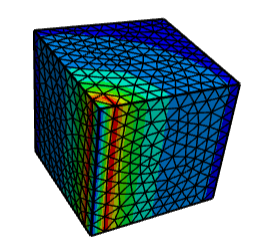

In [7]:
#***** Thin BLOCK ******
current=2./4.e-7
start_point=gp_Pnt(0, 0, -100.0)
end_point=gp_Pnt(0, 0, 100.0)
dx=gp_Vec(0.01, 0.0, 0.0)
dy=gp_Vec(0.0, 0.01, 0.0)
empy=EMPY_BLOCK(current, start_point, end_point, dx, dy)

B=Bfield(empy.field)
mesh = Mesh (unit_cube.GenerateMesh(maxh=0.1))
mip = mesh(1, 0., 0)
print(B(mip))
with TaskManager():
    Draw(B,mesh, order=3, min=0, max=10.)


(0.0, 0.9999500010647342, 0.0)


WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.25…

MPY_BLOCK(current, start_point, end_point, dx, dy)

(0.0, 0.9999500010647342, 0.0)
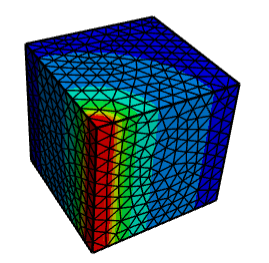

In [10]:
# *****  LOOP ******
radius=0.5
pz=0.5
radialWidth=0.2
axialWidth=0.2
a=radialWidth
mu=4.e-7*math.pi
b0=mu*1/(2*radius)
current=1/b0

coil1=EMPY_LOOP(current, radius, pz, radialWidth, axialWidth)
start_angle=0
end_angle=360
center=gp_Pnt(0,0,pz)

from ngsolve.webgui import Draw
mesh = Mesh (unit_cube.GenerateMesh(maxh=0.1))
mip = mesh(center.x, center.y, center.z)
DrawGeo(coil1.geo)
B=Bfield(coil1.field)
print(B(mip))
with TaskManager():
    Draw(B,mesh, order=3)
    
coil2=EMPY_ARC(current, radius, pz, radialWidth, axialWidth, start_angle, end_angle )
#coil2=EMPY_ARC(current, radius, center, radialWidth, axialWidth, start_angle, end_angle )
DrawGeo(coil2.geo)
B=Bfield(coil2.field)
print(B(mip))
with TaskManager():
    Draw(B,mesh, order=3)

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'ngsolve_version': 'Netgen x.x', 'mesh_dim': 3…

(0.0, 0.0, 0.9926682634595263)


WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.25…

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'ngsolve_version': 'Netgen x.x', 'mesh_dim': 3…

(0.0, 0.0, 0.9926682634595263)


WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.25…

In [5]:
# ***** Thin Loop *****

radius=500.e-3
pz=0.5
radialWidth=1e-3
axialWidth=1e-3
a=radialWidth
angle=360
mu=4.e-7*math.pi
b0=mu*1/(2*radius)
current=1/b0

coil=EMPY_LOOP(current, radius, pz, radialWidth, axialWidth)
DrawGeo(coil.geo)
B=Bfield(coil.field)
from ngsolve.webgui import Draw
mesh = Mesh (unit_cube.GenerateMesh(maxh=0.1))
mip = mesh(0., 0., pz)
print(B(mip))
with TaskManager():
    Draw(B,mesh, order=3, min=0, max=2)

coil=EMPY_LOOP(current, radius, pz, 0, 0)
B=Bfield(coil.field)
mip = mesh(0., 0., pz)
print(B(mip))
with TaskManager():
    Draw(B,mesh, order=3, min=0, max=2)

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'ngsolve_version': 'Netgen x.x', 'mesh_dim': 3…

(0.0, 0.0, 1.0)


WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.25…

(0.0, 0.0, 0.9999999999999999)


WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.25…

In [6]:
radius=0.5
zp=0.5
radialWidth=0.2
axialWidth=0.2  
mu=4.e-7*math.pi
b0=mu*1/(2*radius)
current=1/b0
arc1=EMPY_ARC(current, radius, zp, radialWidth, axialWidth, 0, 180)
arc2=EMPY_ARC(current, radius, zp, radialWidth, axialWidth, 180, 360)
DrawGeo(arc1.geo)
DrawGeo(arc2.geo)
div2=EMPY_Field.EM_COIL()
div2.Add(arc1.field)
div2.Add(arc2.field)
B=Bfield(div2)
A=Afield(div2)
mip = mesh(0., 0., zp)
print(B(mip))
with TaskManager():
    Draw(B,mesh, order=3)
with TaskManager():
    Draw(A,mesh, order=3)

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'ngsolve_version': 'Netgen x.x', 'mesh_dim': 3…

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'ngsolve_version': 'Netgen x.x', 'mesh_dim': 3…

(0.0, 0.0, 0.9926682634595263)


WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.25…

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.25…